# Imports

In [1]:
import os
import numpy as np
import torch

from src.dataset.map_audio_dataset import MapAudioDataset
from src.datamodule.audio_data_module import AudioDataModule
from src.display.display_waveform import *

# Defentions

In [2]:
data_dir = os.path.join("..","..","data")

# Data

## Create DataModule Instance

In [3]:
datamodule = AudioDataModule(data_dir=data_dir,audio_dataset_class=MapAudioDataset)
datamodule.prepare_data()
datamodule.setup(stage='fit')

100%|██████████| 2/2 [00:00<00:00, 2003.01it/s]


CONVERTING WAVS FROM ..\..\data\noisy_trainset_wav TO ..\..\data\noisy_trainset_wav
CONVERTING WAVS FROM ..\..\data\clean_trainset_wav TO ..\..\data\clean_trainset_wav
CONVERTING WAVS FROM ..\..\data\noisy_testset_wav TO ..\..\data\noisy_testset_wav
CONVERTING WAVS FROM ..\..\data\clean_testset_wav TO ..\..\data\clean_testset_wav


## Display sample data

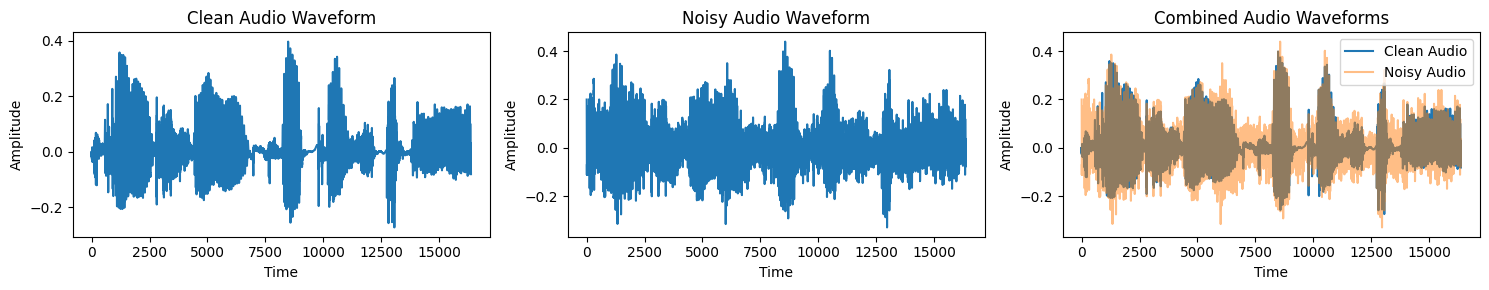

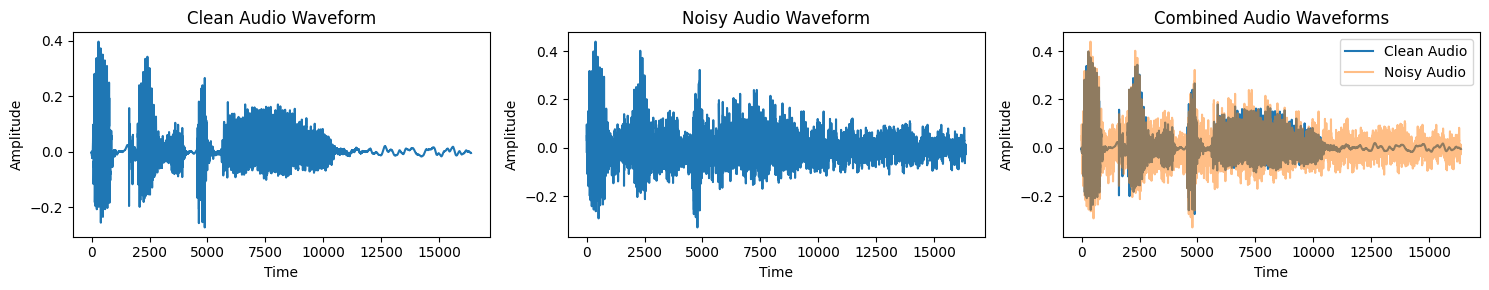

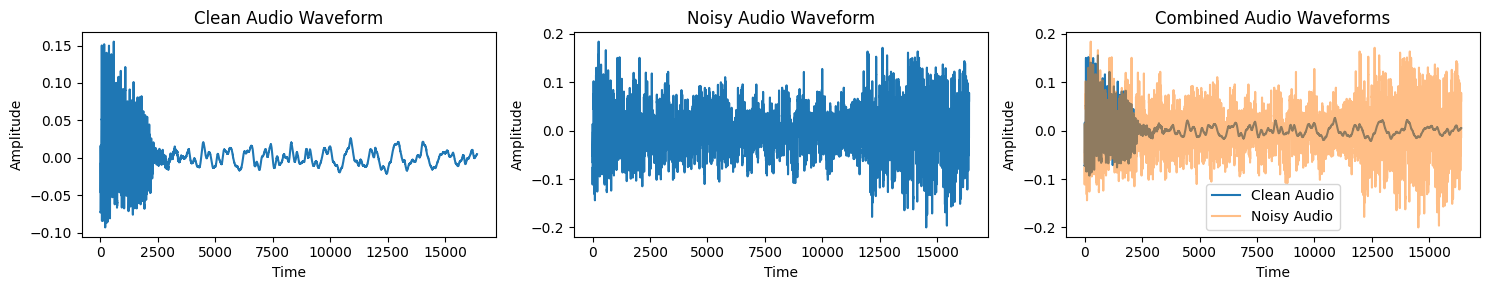

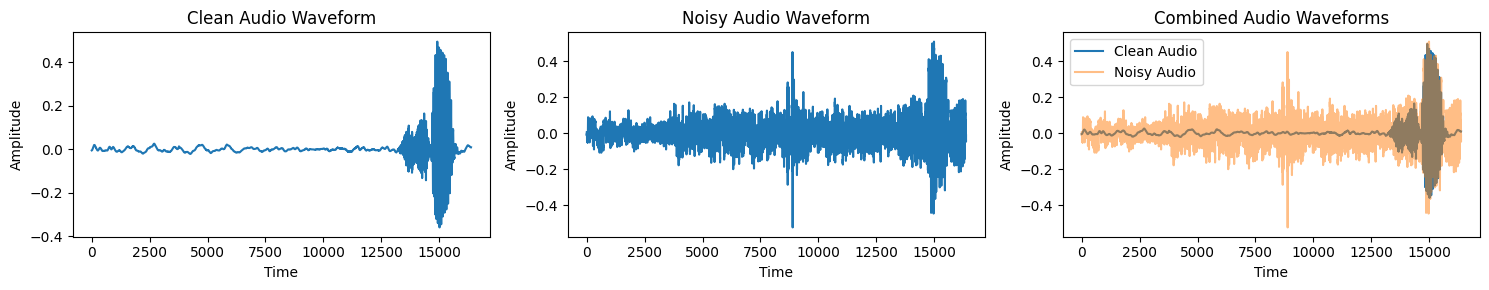

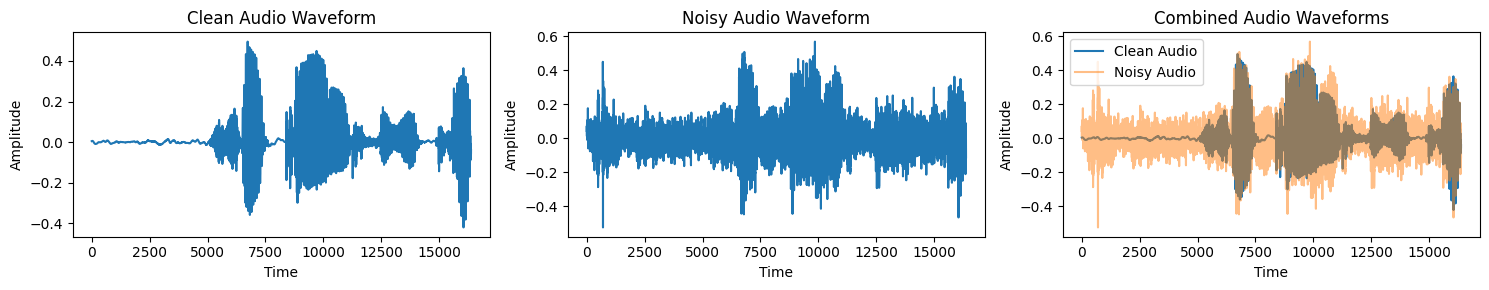

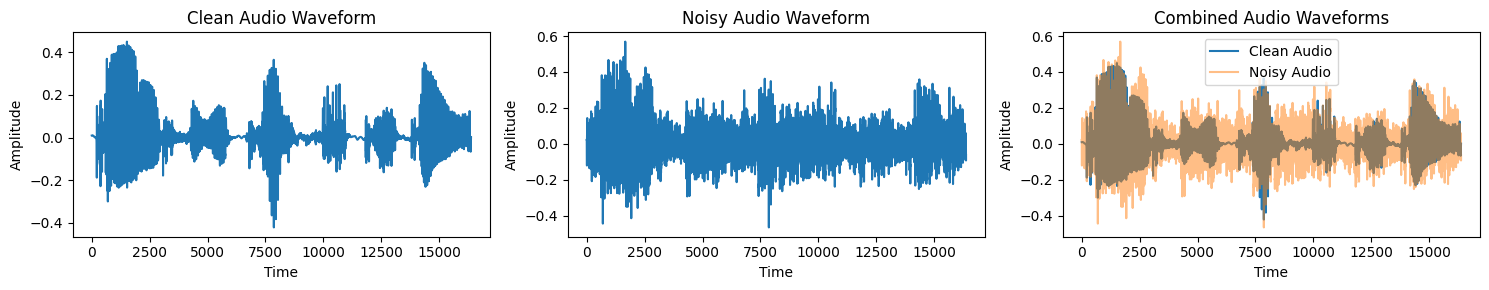

In [4]:
sample_size = 6
sample_index = np.random.randint(0, len(datamodule.train_dataset)-sample_size)
for i in range(sample_index,sample_index+sample_size):
    plot_waveforms(*datamodule.train_dataset[i])

# Net

In [2]:
from src.module.segan_generator import SEGAN_Generator
import torch
generator = SEGAN_Generator()

out = generator(torch.normal(mean=torch.zeros(1,1, 16384),std=torch.ones(1,1, 16384)))

In [6]:
out.shape

torch.Size([1, 2, 16384])

In [7]:
out.mean(),out.std()

(tensor(0.1981, grad_fn=<MeanBackward0>),
 tensor(0.8287, grad_fn=<StdBackward0>))